In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("C:/Users/Brahim/Desktop/brahim/Data/housing_train.csv")

In [4]:
data.head(1)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [5]:
data.dropna(axis='index',how='all',subset=['lat','long'],inplace=True)

In [6]:
data.shape

(263771, 22)

In [7]:
dt=data.copy()

In [8]:
dt['laundry_options'].isnull().sum()



54127

In [9]:
random_sample = dt['laundry_options'].dropna().sample(54127)

In [10]:
random_sample

223915    w/d in unit
102382    w/d hookups
130212    w/d hookups
153545    w/d hookups
46189     w/d hookups
             ...     
240152    w/d in unit
2970      w/d in unit
147560    w/d hookups
31709     w/d in unit
234129    w/d in unit
Name: laundry_options, Length: 54127, dtype: object

In [11]:
random_sample.index


Int64Index([223915, 102382, 130212, 153545,  46189,  24672, 128151,  43471,
            137145, 224852,
            ...
              8819, 248811, 139304, 107143, 131280, 240152,   2970, 147560,
             31709, 234129],
           dtype='int64', length=54127)

In [12]:
dt[dt['laundry_options'].isnull()].index

Int64Index([    10,     49,     62,     64,     65,     73,     77,     78,
                79,    101,
            ...
            265112, 265121, 265124, 265130, 265136, 265157, 265161, 265163,
            265174, 265187],
           dtype='int64', length=54127)

In [13]:
random_sample.index=dt[dt['laundry_options'].isnull()].index

In [14]:
random_sample.index

Int64Index([    10,     49,     62,     64,     65,     73,     77,     78,
                79,    101,
            ...
            265112, 265121, 265124, 265130, 265136, 265157, 265161, 265163,
            265174, 265187],
           dtype='int64', length=54127)

In [15]:
dt.loc[dt['laundry_options'].isnull(), 'laundry_options']=random_sample

In [16]:
dt['laundry_options'].isnull().sum()

0

<AxesSubplot:>

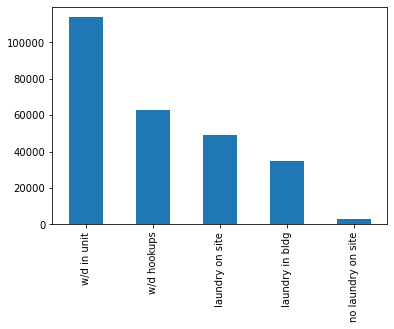

In [17]:
dt['laundry_options'].value_counts().plot(kind='bar')

In [18]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [19]:
imp_features=['price','beds','baths','sqfeet']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='baths'>

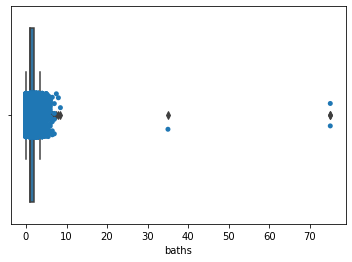

In [20]:
sns.stripplot(dt['baths'])
sns.boxplot(dt['baths'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

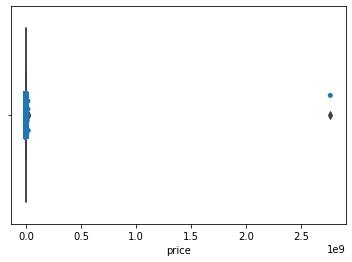

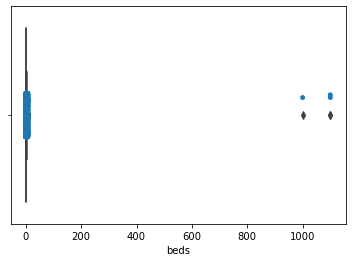

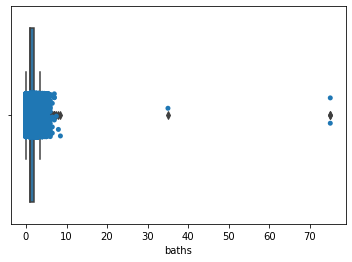

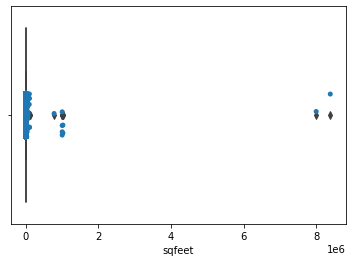

In [21]:
for feature in imp_features:
    plt.figure()
    sns.stripplot(dt[feature])
    sns.boxplot(dt[feature])

In [22]:
import statsmodels.api as sm

In [23]:
def qq_plots(zebi,col):
    plt.figure(figsize=(14,10))
    sm.qqplot(zebi[col], line ='45')
    plt.title('Normal QQplot of {}'.format(col))

<Figure size 1008x720 with 0 Axes>

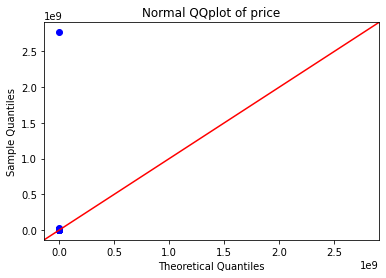

<Figure size 1008x720 with 0 Axes>

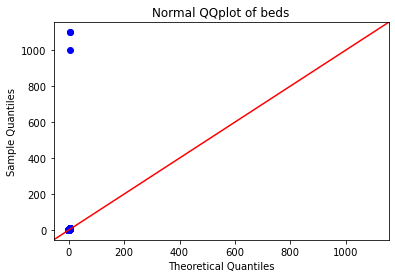

<Figure size 1008x720 with 0 Axes>

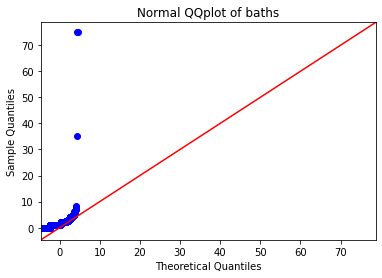

<Figure size 1008x720 with 0 Axes>

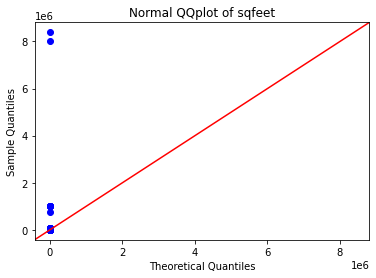

In [24]:
for feature in imp_features:
    qq_plots(dt,feature)
    

In [25]:
cr=dt.copy()

In [26]:
cr['price'].mean()

12330.078647766433

In [27]:
cr['price'].median()



1060.0

In [28]:
cr['price']=np.where(cr['price']>5000,cr['price'].median(),cr['price'])

In [29]:
cr['price'].mean()

1207.3528515265136

In [30]:
def deal_with_features (feature,three):
    cr[feature]=np.where(cr[feature]>three,cr[feature].median(),cr[feature])
    

In [31]:
cr['sqfeet'].nlargest(200)

195751    8388607
7862      8000000
42751     1019856
42752     1019856
63022      999999
           ...   
22519        5000
30498        5000
31092        5000
31294        5000
35225        5000
Name: sqfeet, Length: 200, dtype: int64

In [32]:
deal_with_features('sqfeet',5000)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqfeet', ylabel='Density'>

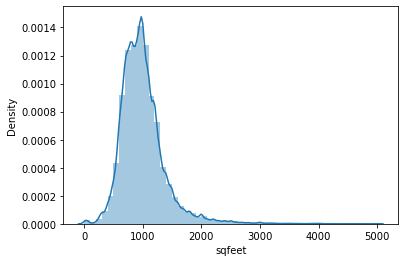

In [33]:
sns.distplot(cr['sqfeet'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


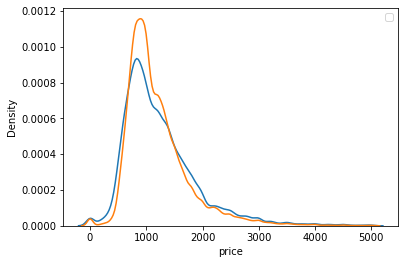

In [34]:
sns.distplot(cr[cr['dogs_allowed']==0]['price'],hist=False)
sns.distplot(cr[cr['dogs_allowed']==1]['price'],hist=False)
plt.legend()

In [35]:
cr.corr().style.background_gradient(cmap='Blues')

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
id,1.000000,0.134772,-0.038769,-0.017795,-0.028081,0.034818,0.024426,0.011674,0.012306,0.019057,-0.022436,-0.006378,-0.102851
price,0.134772,1.000000,0.326490,0.047703,0.239325,-0.042037,-0.033900,-0.165164,0.085760,0.137642,0.023183,-0.034644,-0.218584
sqfeet,-0.038769,0.326490,1.000000,0.174998,0.604643,-0.078665,-0.036908,-0.051534,-0.000421,0.007912,0.017238,-0.000621,0.037274
beds,-0.017795,0.047703,0.174998,1.000000,0.461113,-0.019932,-0.011197,-0.001459,-0.007548,-0.004752,0.003488,0.003749,0.006212
baths,-0.028081,0.239325,0.604643,0.461113,1.000000,-0.021516,0.015943,-0.018687,0.028303,0.009236,0.041157,-0.098216,-0.007965
cats_allowed,0.034818,-0.042037,-0.078665,-0.019932,-0.021516,1.000000,0.887186,0.036541,0.118325,0.053525,-0.076369,-0.013148,0.054597
dogs_allowed,0.024426,-0.033900,-0.036908,-0.011197,0.015943,0.887186,1.000000,0.031869,0.128308,0.053380,-0.055738,-0.052023,0.039935
smoking_allowed,0.011674,-0.165164,-0.051534,-0.001459,-0.018687,0.036541,0.031869,1.000000,-0.204326,-0.100159,-0.150293,-0.129610,0.118966
wheelchair_access,0.012306,0.085760,-0.000421,-0.007548,0.028303,0.118325,0.128308,-0.204326,1.000000,0.206526,0.152672,-0.019009,-0.006892
electric_vehicle_charge,0.019057,0.137642,0.007912,-0.004752,0.009236,0.053525,0.053380,-0.100159,0.206526,1.000000,0.069265,0.010245,-0.061936


In [36]:
cr.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [78]:
df=cr.copy()

In [79]:
df.drop(['id', 'url', 'region_url','beds',
       'baths', 'cats_allowed','image_url', 'description', 'lat',
       'long'],axis=1,inplace=True)

In [80]:
df.columns

Index(['region', 'price', 'type', 'sqfeet', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'state'],
      dtype='object')

In [81]:
cc_feature=[feature for feature in df.columns if df[feature].dtype == 'O']

In [82]:
for feature in cc_feature:
    print('Total diff  in {} are {}'.format(feature,len(df[feature].unique())))

Total diff  in region are 298
Total diff  in type are 12
Total diff  in laundry_options are 5
Total diff  in parking_options are 8
Total diff  in state are 38


In [83]:
pd.set_option("display.max_rows",298)
region_count=df['region'].value_counts()

In [84]:
important=region_count[region_count<500].index
important

Index(['mohave county', 'northwest GA', 'bloomington-normal', 'peoria',
       'florida keys', 'visalia-tulare', 'san luis obispo', 'holland', 'maine',
       'watertown',
       ...
       'oregon coast', 'lima / findlay', 'corvallis/albany', 'kansas city',
       'zanesville / cambridge', 'tuscarawas co', 'mansfield', 'northwest OK',
       'texoma', 'east oregon'],
      dtype='object', length=157)

In [85]:
def remove(x):
    if x not in important:
        return 'other'
    else:
        return x 


In [86]:
df['region']=df['region'].apply(remove)

In [87]:
df['region'].tail(90)

265099         other
265100         other
265101         other
265102         other
265103         other
265104         other
265105         other
265106         other
265107         other
265108         other
265109         other
265110         other
265111         other
265112         other
265113         other
265114         other
265115         other
265116         other
265117         other
265118         other
265119         other
265120         other
265121         other
265122         other
265123         other
265124         other
265125         other
265126         other
265127         other
265128         other
265129         other
265130         other
265131         other
265132         other
265133         other
265134         other
265135         other
265136         other
265137         other
265138         other
265139         other
265140         other
265141         other
265142         other
265143         other
265144         other
265145         other
265146       

In [90]:
def get_stats(feature):
    count=df[feature].value_counts()
    pd.set_option('display.max_row',df[feature].nunique())
    return count

In [91]:
get_stats('state')

ca    32997
fl    31687
nc    18490
mi    14439
ga    13773
co    11200
ny     9958
il     9615
ks     7889
ia     7462
mn     7445
md     7437
la     7291
az     6742
oh     6537
in     6400
al     6190
nj     5601
ky     5397
ms     4963
ma     4894
id     4365
ct     3753
nd     3428
ar     3145
nm     2907
nv     2836
ne     2693
dc     2478
ak     2148
mo     2137
de     2046
hi     1830
nh     1754
mt     1331
me      420
ok       49
or       44
Name: state, dtype: int64